In [90]:
import pandas as pd
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split


In [91]:
#读入数据并查看前5行
sms_raw = pd.read_csv("D:/input/sms_spam.csv")
sms_raw.head(5)

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [92]:
# 使用Describe函数查看数据文件特征
sms_raw.describe()

,type,text
count,5567,5567
unique,2,5054
top,ham,"Sorry, I'll call later"
freq,4822,30


In [93]:
# 查看两个数据的类型
sms_raw.dtypes

type    object
text    object
dtype: object

In [94]:
# factorize函数返回一个元组(labels,uniques) unique存储去重后的数据['ham','spam'],labels则存储该数据在unique中的索引，如'ham'是0，'spam为1'
sms_raw['type'] = pd.Series(sms_raw['type'].factorize()).iloc[0]
sms_raw.head(5)

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [95]:
#查看编码后的特征分布
sms_raw.groupby('type').count()

,text
type,
0,4822
1,745


In [96]:
# 将所有字母转换为小写
def tolower(text):
    return text.lower()
# 去除标点符号和数字
def removePunctuation(text):
    return text.translate({None: string.punctuation+('1234567890')})
# 进行变换:去除标点后变小写
sms_raw['text'] = sms_raw['text'].map(removePunctuation).map(tolower)


In [97]:
# 去除停用词
# sms_counts是一个矩阵，其中每一行代表一个文本，每一列代表一个单词，每个单元格中的值表示该单词在该文本中出现的次数。
count_vect = CountVectorizer(stop_words="english",decode_error='ignore')
sms_counts = count_vect.fit_transform(sms_raw['text'])
sms_counts.shape

(5567, 5388)

In [98]:
#降低词频矩阵维度
tfidf_vect = TfidfVectorizer(stop_words="english",decode_error='ignore',min_df=5)
sms_tfidf = tfidf_vect.fit_transform(sms_raw['text'])
sms_tfidf.shape

(5567, 912)

In [99]:
#训练集测试集划分
train_x, test_x, train_y, test_y = train_test_split(sms_tfidf, sms_raw['type'], test_size=0.3)
#查看占比
train_y.value_counts()/len(train_y)

0    0.865246
1    0.134754
Name: type, dtype: float64

In [100]:
test_y.value_counts()/len(test_y)

0    0.868342
1    0.131658
Name: type, dtype: float64

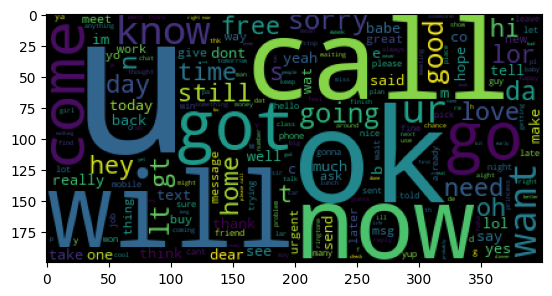

In [101]:
#查看全部信息词云
wc = WordCloud()
wc.generate(''.join(sms_raw['text']))
plt.imshow(wc)
plt.show()

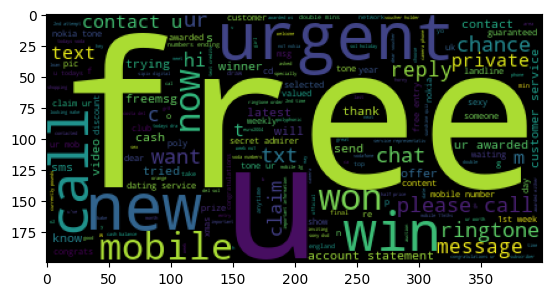

In [102]:
#查看垃圾短信的词云：
wc.generate(''.join(sms_raw['text'][sms_raw['type']==1]))
plt.imshow(wc)
plt.show()

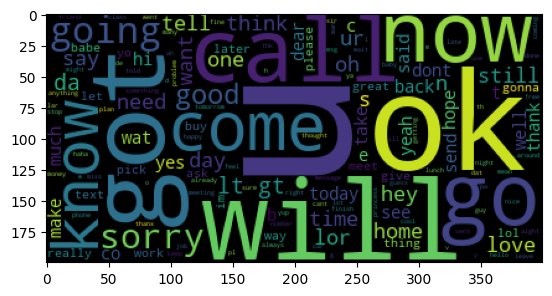

In [103]:
#查看非垃圾短信的词云
wc.generate(''.join(sms_raw['text'][sms_raw['type']==0]))
plt.imshow(wc)
plt.show()

In [104]:
#利用朴素贝叶斯分类器快速构建和训练模型
sms_classifier = MultinomialNB().fit(train_x,train_y)

In [105]:
# 对测试集的样本进行预测
test_pred = sms_classifier.predict(test_x)
# 与真实值比较，查看模型对正样本和负样本的预测情况。
metrics.confusion_matrix(test_y, test_pred)
#混淆矩阵：
# TP FN
# FP TN
#表示True/False)(Positive/Negative)

array([[1440,   11],
       [  64,  156]], dtype=int64)